In [ ]:

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Replace 'your_folder_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/noutnull.csv'
df = pd.read_csv(file_path)

df


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Date,Location,MinimumTemperature,MaximumTemperature,Rainfall,Evaporation,Sunshine,WindGustDirection,WindGustSpeed,WindDirection9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temperature9am,Temperature3pm,CloudBurst Today,CloudBurstTomorrow
0,01-12-2008,Albury,13.4,22.900000,0.6,5.318667,7.611178,W,44.000000,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.100000,0.0,5.318667,7.611178,WNW,44.000000,NNW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.700000,0.0,5.318667,7.611178,WSW,46.000000,W,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.000000,0.0,5.318667,7.611178,NE,24.000000,SE,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.300000,1.0,5.318667,7.611178,W,41.000000,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21-06-2017,Uluru,2.8,23.400000,0.0,5.318667,7.611178,E,31.000000,SE,...,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,No,No
145456,22-06-2017,Uluru,3.6,25.300000,0.0,5.318667,7.611178,NNW,22.000000,SE,...,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,No,No
145457,23-06-2017,Uluru,5.4,26.900000,0.0,5.318667,7.611178,N,37.000000,SE,...,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,No,No
145458,24-06-2017,Uluru,7.8,27.000000,0.0,5.318667,7.611178,SE,28.000000,SSE,...,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,No,No


In [ ]:
for col in df.select_dtypes(include=['float64', 'int64']):  # Check only numeric columns
        has_negatives = (df[col] < 0).any()
        has_zeros = (df[col] == 0).any()
        print(f"Column '{col}': Negatives: {has_negatives}, Zeros: {has_zeros}")



Column 'MinimumTemperature': Negatives: True, Zeros: True
Column 'MaximumTemperature': Negatives: False, Zeros: False
Column 'Rainfall': Negatives: False, Zeros: True
Column 'Evaporation': Negatives: False, Zeros: False
Column 'Sunshine': Negatives: False, Zeros: False
Column 'WindGustSpeed': Negatives: False, Zeros: False
Column 'WindSpeed9am': Negatives: False, Zeros: True
Column 'WindSpeed3pm': Negatives: False, Zeros: True
Column 'Humidity9am': Negatives: False, Zeros: False
Column 'Humidity3pm': Negatives: False, Zeros: True
Column 'Pressure9am': Negatives: False, Zeros: False
Column 'Pressure3pm': Negatives: False, Zeros: False
Column 'Cloud9am': Negatives: False, Zeros: True
Column 'Cloud3pm': Negatives: False, Zeros: False
Column 'Temperature9am': Negatives: True, Zeros: True
Column 'Temperature3pm': Negatives: False, Zeros: False


In [ ]:
df.isnull().sum()

,0
Date,0
Location,0
MinimumTemperature,0
MaximumTemperature,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDirection,0
WindGustSpeed,0
WindDirection9am,0


In [ ]:

def count_outliers(df):
    outlier_counts = {}
    for col in df.select_dtypes(include=['float64', 'int64']):  # Check for numeric columns
        Q1 = df[col].quantile(0.25)  # 25th percentile (Q1)
        Q3 = df[col].quantile(0.75)  # 75th percentile (Q3)
        IQR = Q3 - Q1  # Interquartile Range

        lower_bound = Q1 - 1.5 * IQR  # Lower bound
        upper_bound = Q3 + 1.5 * IQR  # Upper bound

        # Count outliers (values outside the bounds)
        outlier_counts[col] = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

    return outlier_counts

# Call the function and display outlier counts for each column
outliers = count_outliers(df)
print("Outliers in each column:")
for col, count in outliers.items():
    print(f"{col}: {count} outliers")


Outliers in each column:
MinimumTemperature: 0 outliers
MaximumTemperature: 0 outliers
Rainfall: 0 outliers
Evaporation: 0 outliers
Sunshine: 0 outliers
WindGustSpeed: 0 outliers
WindSpeed9am: 0 outliers
WindSpeed3pm: 0 outliers
Humidity9am: 0 outliers
Humidity3pm: 0 outliers
Pressure9am: 1593 outliers
Pressure3pm: 1351 outliers
Cloud9am: 0 outliers
Cloud3pm: 0 outliers
Temperature9am: 0 outliers
Temperature3pm: 0 outliers


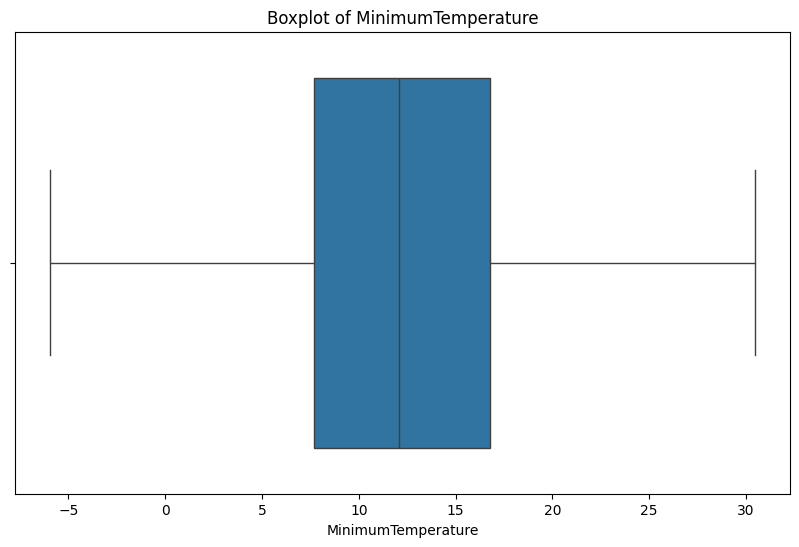

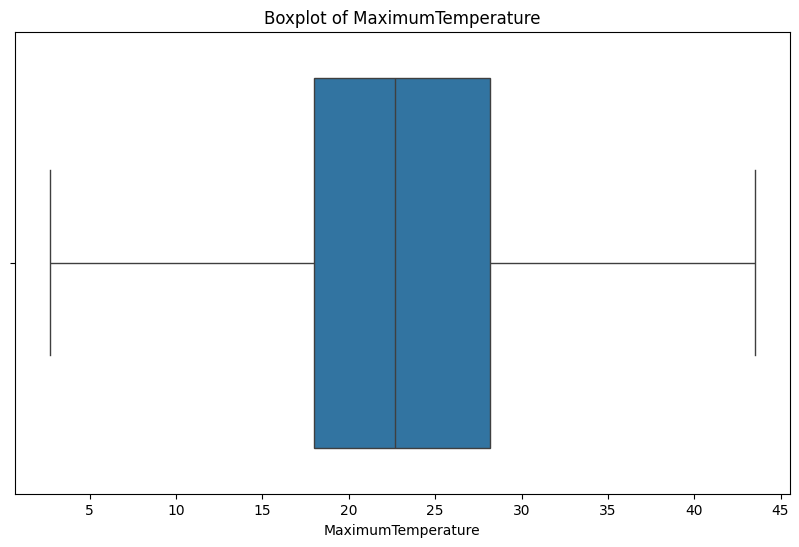

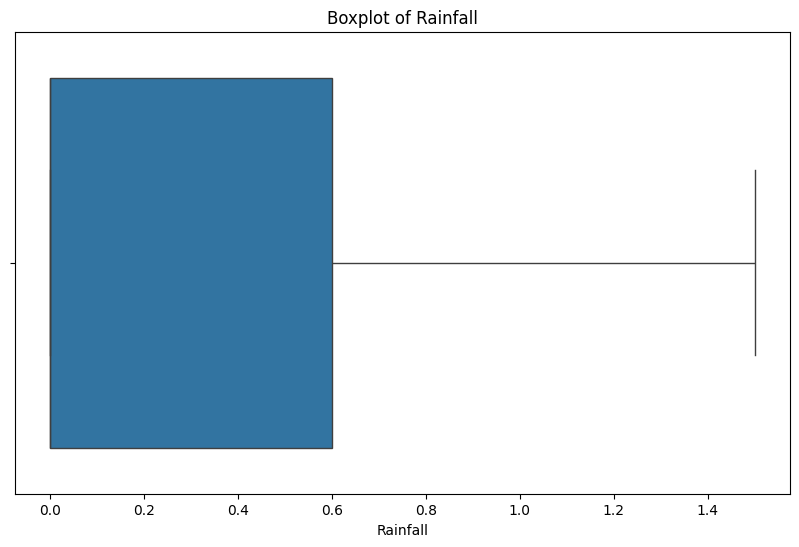

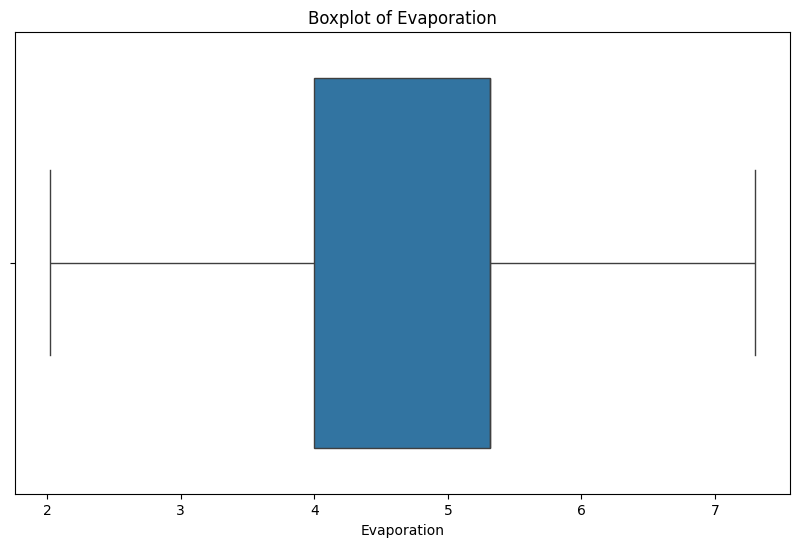

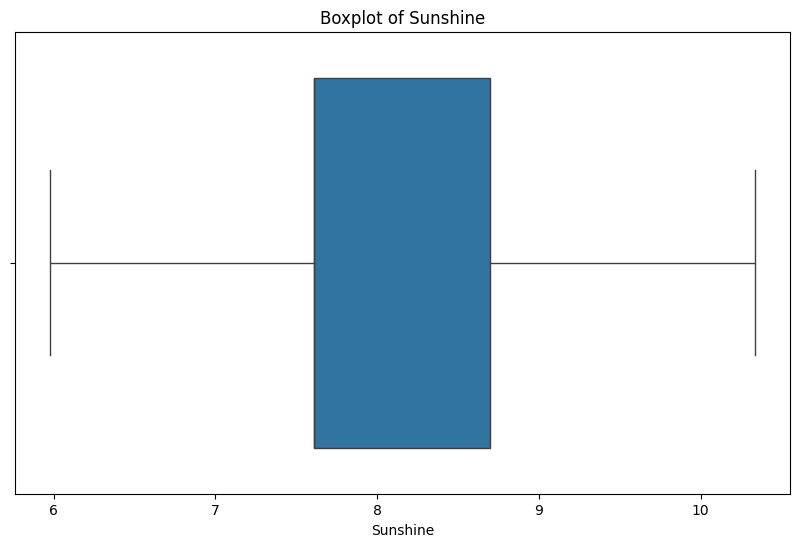

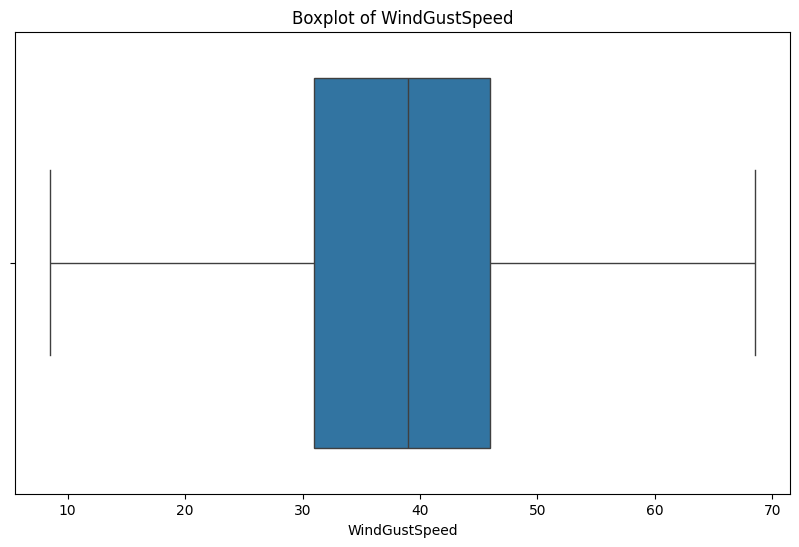

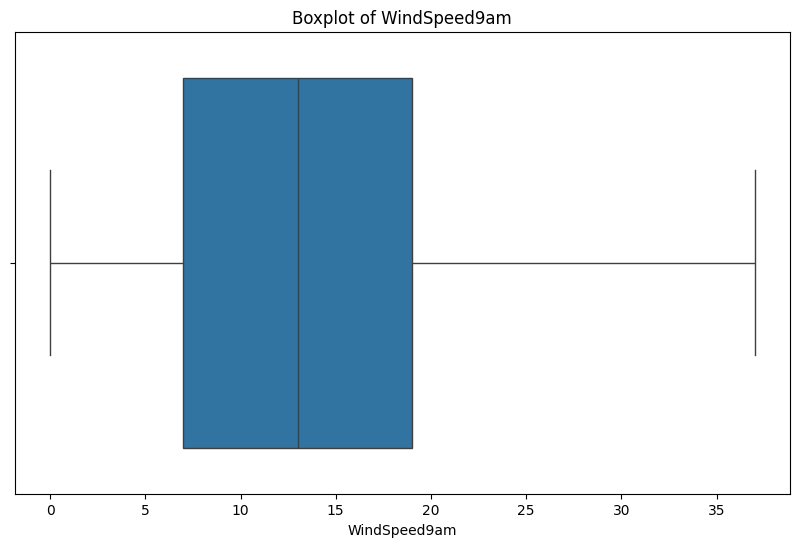

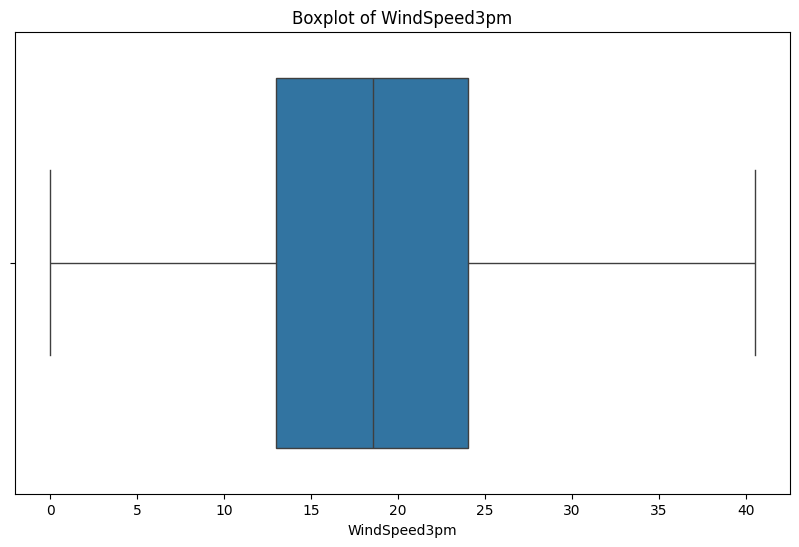

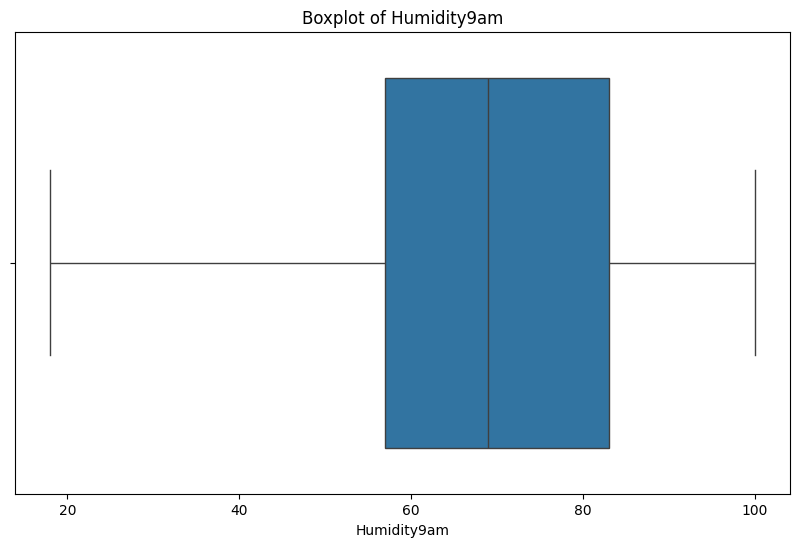

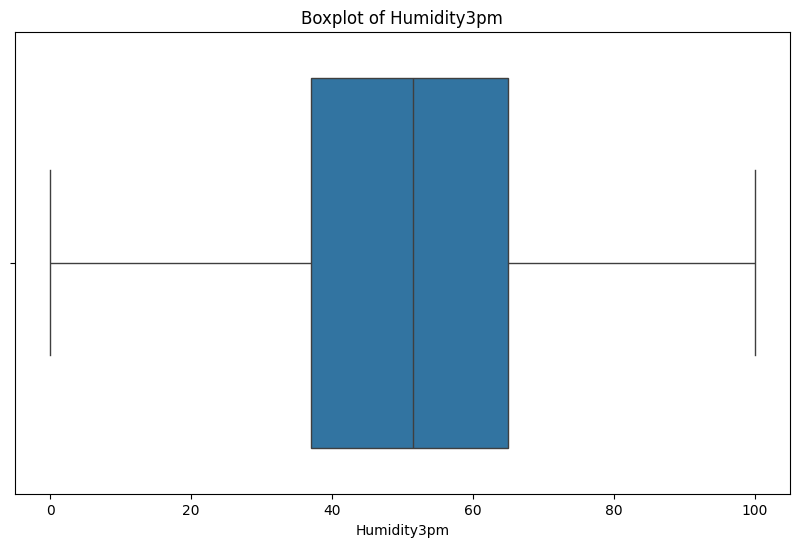

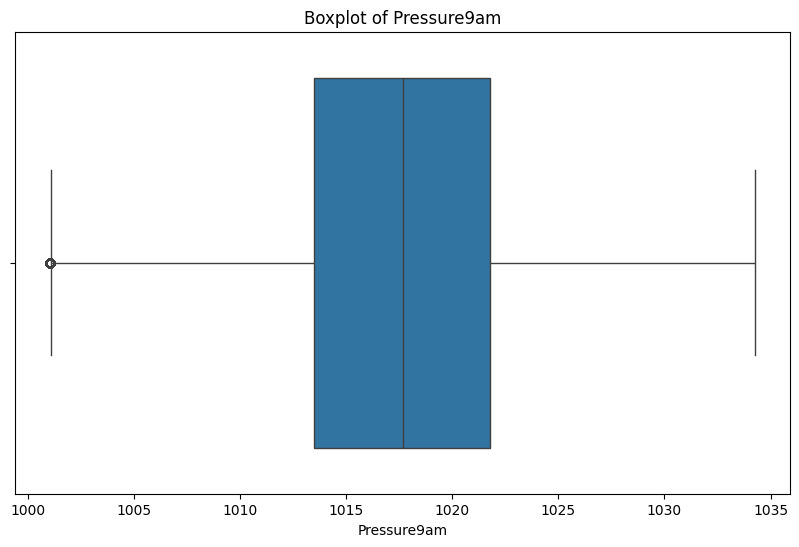

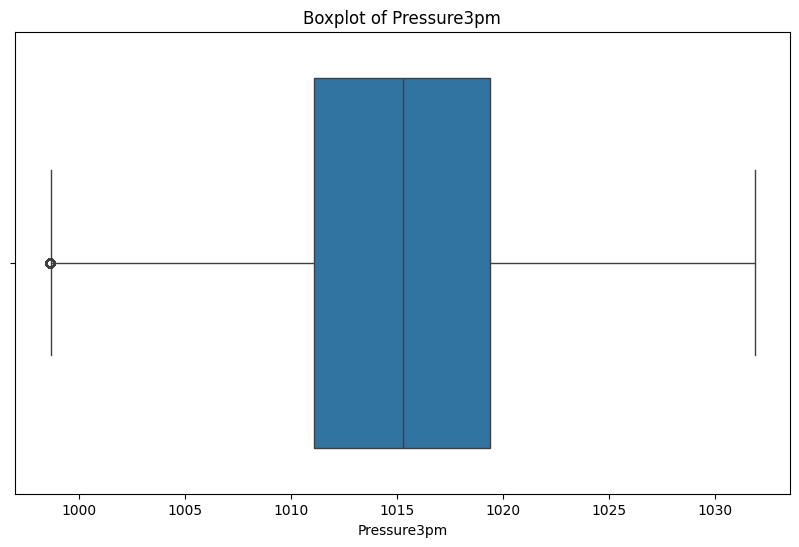

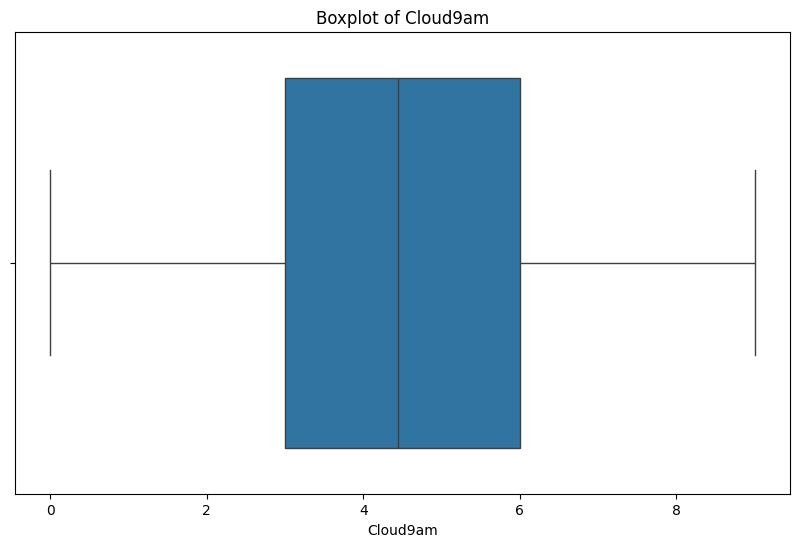

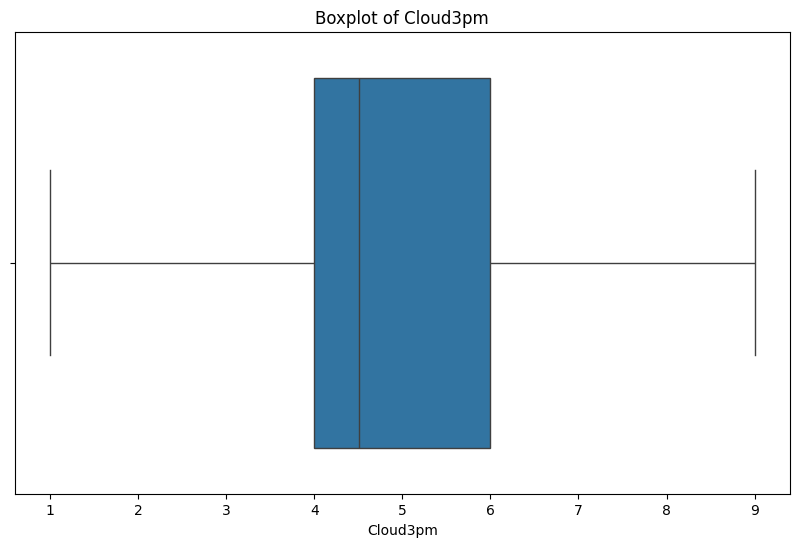

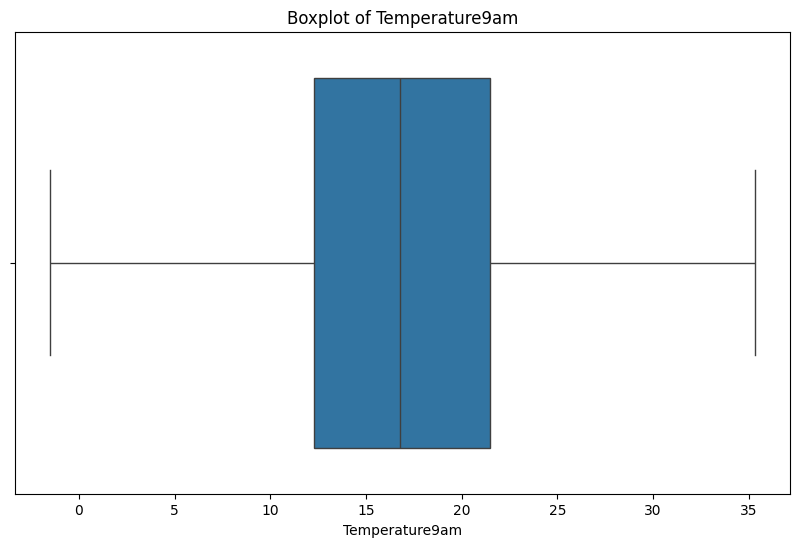

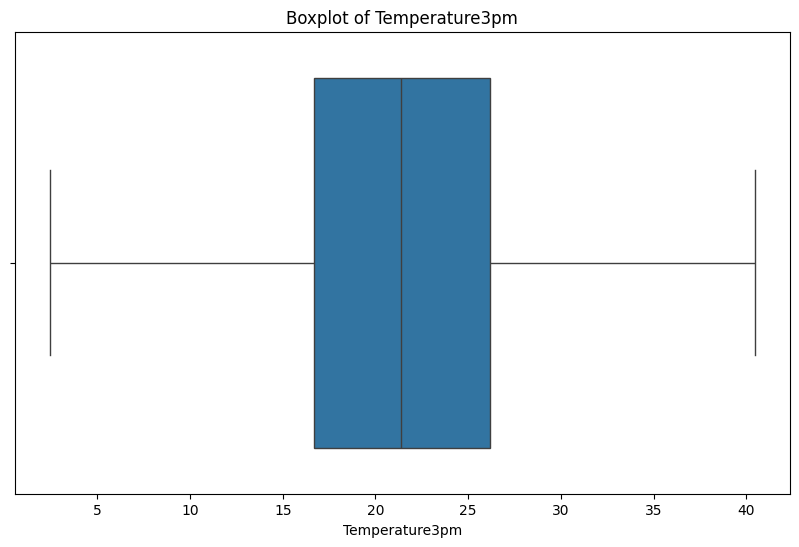

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for each numeric column in your dataset
for col in df.select_dtypes(include=['float64', 'int64']):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()


<ipython-input-8-507c59f4b0a4>:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['Pressure9am'].dropna(), df['Pressure3pm'].dropna()], labels=['Pressure9am', 'Pressure3pm'])


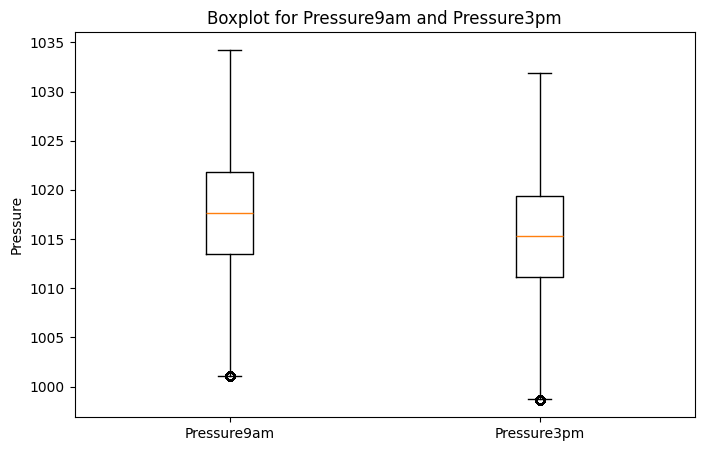

In [ ]:
import matplotlib.pyplot as plt

# Plot boxplot
plt.figure(figsize=(8, 5))
plt.boxplot([df['Pressure9am'].dropna(), df['Pressure3pm'].dropna()], labels=['Pressure9am', 'Pressure3pm'])
plt.title('Boxplot for Pressure9am and Pressure3pm')
plt.ylabel('Pressure')
plt.show()


<ipython-input-9-a453aadeea1a>:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['Pressure9am'].dropna(), df['Pressure3pm'].dropna()], labels=['Pressure9am', 'Pressure3pm'])


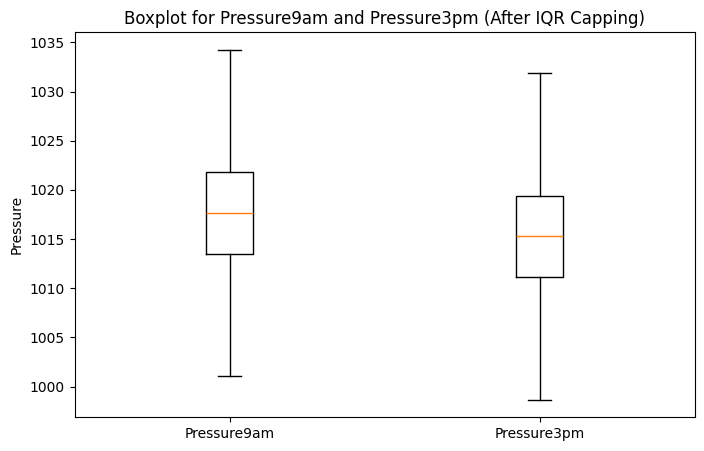

In [ ]:
import matplotlib.pyplot as plt

# Function to apply IQR capping
def iqr_capping(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return series.clip(lower_bound, upper_bound)

# Apply IQR capping to remove outliers
df['Pressure9am'] = iqr_capping(df['Pressure9am'])
df['Pressure3pm'] = iqr_capping(df['Pressure3pm'])

# Plot boxplot after capping
plt.figure(figsize=(8, 5))
plt.boxplot([df['Pressure9am'].dropna(), df['Pressure3pm'].dropna()], labels=['Pressure9am', 'Pressure3pm'])
plt.title('Boxplot for Pressure9am and Pressure3pm (After IQR Capping)')
plt.ylabel('Pressure')
plt.show()


In [ ]:

def count_outliers(df):
    outlier_counts = {}
    for col in df.select_dtypes(include=['float64', 'int64']):  # Check for numeric columns
        Q1 = df[col].quantile(0.25)  # 25th percentile (Q1)
        Q3 = df[col].quantile(0.75)  # 75th percentile (Q3)
        IQR = Q3 - Q1  # Interquartile Range

        lower_bound = Q1 - 1.5 * IQR  # Lower bound
        upper_bound = Q3 + 1.5 * IQR  # Upper bound

        # Count outliers (values outside the bounds)
        outlier_counts[col] = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

    return outlier_counts

# Call the function and display outlier counts for each column
outliers = count_outliers(df)
print("Outliers in each column:")
for col, count in outliers.items():
    print(f"{col}: {count} outliers")


Outliers in each column:
MinimumTemperature: 0 outliers
MaximumTemperature: 0 outliers
Rainfall: 0 outliers
Evaporation: 0 outliers
Sunshine: 0 outliers
WindGustSpeed: 0 outliers
WindSpeed9am: 0 outliers
WindSpeed3pm: 0 outliers
Humidity9am: 0 outliers
Humidity3pm: 0 outliers
Pressure9am: 0 outliers
Pressure3pm: 0 outliers
Cloud9am: 0 outliers
Cloud3pm: 0 outliers
Temperature9am: 0 outliers
Temperature3pm: 0 outliers


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define file path in Google Drive
file_path = "/content/drive/My Drive/cleaned.csv"

# Save dataset
df.to_csv(file_path, index=False)

print(f"Dataset saved as 'cleaned.csv' in Google Drive at: {file_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset saved as 'cleaned.csv' in Google Drive at: /content/drive/My Drive/cleaned.csv


In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Print categorical columns
print("Categorical Columns:", list(categorical_cols))


Categorical Columns: ['Date', 'Location', 'WindGustDirection', 'WindDirection9am', 'WindDirection3pm', 'CloudBurst Today', 'CloudBurstTomorrow']


In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Print categorical columns
print("Categorical Columns:", list(categorical_cols))


In [ ]:
df

In [ ]:
df.shape

(145460, 23)

In [ ]:
#extracting d//m//y from date

In [ ]:
# Convert Date column to datetime with automatic detection
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Check for any conversion errors
if df['Date'].isna().sum() > 0:
    print("Warning: Some dates could not be parsed!")

# Extract features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Drop original Date column
df.drop(columns=['Date'], inplace=True)

print("Date column transformed into Year, Month, Day.")


Date column transformed into Year, Month, Day.


In [ ]:
pd.reset_option('display.max_rows')


In [ ]:
df

,Location,MinimumTemperature,MaximumTemperature,Rainfall,Evaporation,Sunshine,WindGustDirection,WindGustSpeed,WindDirection9am,WindDirection3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temperature9am,Temperature3pm,CloudBurst Today,CloudBurstTomorrow,Year,Month,Day
0,Albury,13.4,22.900000,0.6,5.318667,7.611178,W,44.000000,W,WNW,...,1007.1,8.000000,4.50993,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.100000,0.0,5.318667,7.611178,WNW,44.000000,NNW,WSW,...,1007.8,4.447461,4.50993,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.700000,0.0,5.318667,7.611178,WSW,46.000000,W,WSW,...,1008.7,4.447461,2.00000,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.000000,0.0,5.318667,7.611178,NE,24.000000,SE,E,...,1012.8,4.447461,4.50993,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.300000,1.0,5.318667,7.611178,W,41.000000,ENE,NW,...,1006.0,7.000000,8.00000,17.8,29.7,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.400000,0.0,5.318667,7.611178,E,31.000000,SE,ENE,...,1020.3,4.447461,4.50993,10.1,22.4,No,No,2017,6,21
145456,Uluru,3.6,25.300000,0.0,5.318667,7.611178,NNW,22.000000,SE,N,...,1019.1,4.447461,4.50993,10.9,24.5,No,No,2017,6,22
145457,Uluru,5.4,26.900000,0.0,5.318667,7.611178,N,37.000000,SE,WNW,...,1016.8,4.447461,4.50993,12.5,26.1,No,No,2017,6,23
145458,Uluru,7.8,27.000000,0.0,5.318667,7.611178,SE,28.000000,SSE,N,...,1016.5,3.000000,2.00000,15.1,26.0,No,No,2017,6,24


In [ ]:
unique_count = df['Location'].nunique()
print(f"Unique values in 'Location': {unique_count}")
print(df['Location'].unique())

Unique values in 'Location': 49
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


In [ ]:
#too many uniq entities for one hot hence target

In [ ]:
!pip install category_encoders



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.5 MB/s eta 0:00:00


In [ ]:
# encode target
# Encode 'CloudBurstTomorrow' (Yes → 1, No → 0)
df['CloudBurstTomorrow'] = df['CloudBurstTomorrow'].map({'No': 0, 'Yes': 1})

print("Target column 'CloudBurstTomorrow' encoded to 0/1.")



Target column 'CloudBurstTomorrow' encoded to 0/1.


In [ ]:
from category_encoders import TargetEncoder

# Initialize Target Encoder
encoder = TargetEncoder()

# Apply Target Encoding
df['Location'] = encoder.fit_transform(df[['Location']], df['CloudBurstTomorrow'])

print("Target Encoding applied to 'Location'.")


Target Encoding applied to 'Location'.


In [ ]:
df


,Location,MinimumTemperature,MaximumTemperature,Rainfall,Evaporation,Sunshine,WindGustDirection,WindGustSpeed,WindDirection9am,WindDirection3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temperature9am,Temperature3pm,CloudBurst Today,CloudBurstTomorrow,Year,Month,Day
0,0.203289,13.4,22.900000,0.6,5.318667,7.611178,W,44.000000,W,WNW,...,1007.1,8.000000,4.50993,16.9,21.8,No,0,2008,12,1
1,0.203289,7.4,25.100000,0.0,5.318667,7.611178,WNW,44.000000,NNW,WSW,...,1007.8,4.447461,4.50993,17.2,24.3,No,0,2008,12,2
2,0.203289,12.9,25.700000,0.0,5.318667,7.611178,WSW,46.000000,W,WSW,...,1008.7,4.447461,2.00000,21.0,23.2,No,0,2008,12,3
3,0.203289,9.2,28.000000,0.0,5.318667,7.611178,NE,24.000000,SE,E,...,1012.8,4.447461,4.50993,18.1,26.5,No,0,2008,12,4
4,0.203289,17.5,32.300000,1.0,5.318667,7.611178,W,41.000000,ENE,NW,...,1006.0,7.000000,8.00000,17.8,29.7,No,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0.073511,2.8,23.400000,0.0,5.318667,7.611178,E,31.000000,SE,ENE,...,1020.3,4.447461,4.50993,10.1,22.4,No,0,2017,6,21
145456,0.073511,3.6,25.300000,0.0,5.318667,7.611178,NNW,22.000000,SE,N,...,1019.1,4.447461,4.50993,10.9,24.5,No,0,2017,6,22
145457,0.073511,5.4,26.900000,0.0,5.318667,7.611178,N,37.000000,SE,WNW,...,1016.8,4.447461,4.50993,12.5,26.1,No,0,2017,6,23
145458,0.073511,7.8,27.000000,0.0,5.318667,7.611178,SE,28.000000,SSE,N,...,1016.5,3.000000,2.00000,15.1,26.0,No,0,2017,6,24


In [ ]:
# encode target
# Encode 'CloudBurstTomorrow' (Yes → 1, No → 0)
df['CloudBurst Today'] = df['CloudBurst Today'].map({'No': 0, 'Yes': 1})

print("Target column 'CloudBurst Today' encoded to 0/1.")



Target column 'CloudBurst Today' encoded to 0/1.


In [ ]:
df

,Location,MinimumTemperature,MaximumTemperature,Rainfall,Evaporation,Sunshine,WindGustDirection,WindGustSpeed,WindDirection9am,WindDirection3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temperature9am,Temperature3pm,CloudBurst Today,CloudBurstTomorrow,Year,Month,Day
0,0.203289,13.4,22.900000,0.6,5.318667,7.611178,W,44.000000,W,WNW,...,1007.1,8.000000,4.50993,16.9,21.8,0,0,2008,12,1
1,0.203289,7.4,25.100000,0.0,5.318667,7.611178,WNW,44.000000,NNW,WSW,...,1007.8,4.447461,4.50993,17.2,24.3,0,0,2008,12,2
2,0.203289,12.9,25.700000,0.0,5.318667,7.611178,WSW,46.000000,W,WSW,...,1008.7,4.447461,2.00000,21.0,23.2,0,0,2008,12,3
3,0.203289,9.2,28.000000,0.0,5.318667,7.611178,NE,24.000000,SE,E,...,1012.8,4.447461,4.50993,18.1,26.5,0,0,2008,12,4
4,0.203289,17.5,32.300000,1.0,5.318667,7.611178,W,41.000000,ENE,NW,...,1006.0,7.000000,8.00000,17.8,29.7,0,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0.073511,2.8,23.400000,0.0,5.318667,7.611178,E,31.000000,SE,ENE,...,1020.3,4.447461,4.50993,10.1,22.4,0,0,2017,6,21
145456,0.073511,3.6,25.300000,0.0,5.318667,7.611178,NNW,22.000000,SE,N,...,1019.1,4.447461,4.50993,10.9,24.5,0,0,2017,6,22
145457,0.073511,5.4,26.900000,0.0,5.318667,7.611178,N,37.000000,SE,WNW,...,1016.8,4.447461,4.50993,12.5,26.1,0,0,2017,6,23
145458,0.073511,7.8,27.000000,0.0,5.318667,7.611178,SE,28.000000,SSE,N,...,1016.5,3.000000,2.00000,15.1,26.0,0,0,2017,6,24


In [ ]:
# prompt: print 2 rows where CloudBurst Today is 1

# Assuming 'df' is your DataFrame from the previous code
print(df[df['CloudBurst Today'] == 1].head(2))


    Location  MinimumTemperature  MaximumTemperature  Rainfall  Evaporation  \
9   0.203289                13.1                30.1       1.4     5.318667   
11  0.203289                15.9                21.7       1.5     5.318667   

    Sunshine WindGustDirection  WindGustSpeed WindDirection9am  \
9   7.611178                 W           28.0                S   
11  7.611178               NNE           31.0               NE   

   WindDirection3pm  ...  Pressure3pm  Cloud9am  Cloud3pm  Temperature9am  \
9               SSE  ...       1005.7  4.447461   4.50993            20.1   
11              ENE  ...       1004.2  8.000000   8.00000            15.9   

    Temperature3pm  CloudBurst Today  CloudBurstTomorrow  Year  Month  Day  
9             28.2                 1                   0  2008     12   10  
11            17.0                 1                   1  2008     12   12  

[2 rows x 25 columns]


In [ ]:
# Identify remaining categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Columns left to encode:", list(categorical_cols))


Columns left to encode: ['WindGustDirection', 'WindDirection9am', 'WindDirection3pm']


In [ ]:
df['WindGustDirection']

,WindGustDirection
0,W
1,WNW
2,WSW
3,NE
4,W
...,...
145455,E
145456,NNW
145457,N
145458,SE


In [ ]:
# Get unique values for each wind direction column
unique_wind_gust = df['WindGustDirection'].unique()
unique_wind_9am = df['WindDirection9am'].unique()
unique_wind_3pm = df['WindDirection3pm'].unique()

# Display unique values
print("Unique values in WindGustDirection:", unique_wind_gust)
print("Unique values in WindDirection9am:", unique_wind_9am)
print("Unique values in WindDirection3pm:", unique_wind_3pm)


Unique values in WindGustDirection: ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']
Unique values in WindDirection9am: ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'N' 'SSW' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']
Unique values in WindDirection3pm: ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']


In [ ]:
#convert dir to angloes


In [ ]:
import numpy as np
#windgustdir
# Mapping wind directions to angles
wind_direction_map = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5, 'E': 90, 'ESE': 112.5,
    'SE': 135, 'SSE': 157.5, 'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
    'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}

# Convert directions to angles
df['WindGustDirection'] = df['WindGustDirection'].map(wind_direction_map)

# Apply cyclic encoding
df['WindGustDirection_sin'] = np.sin(np.deg2rad(df['WindGustDirection']))
df['WindGustDirection_cos'] = np.cos(np.deg2rad(df['WindGustDirection']))

# Drop original column
df.drop(columns=['WindGustDirection'], inplace=True)

print("Cyclic Encoding applied to WindGustDirection.")


Cyclic Encoding applied to WindGustDirection.


In [ ]:
#9am
# Convert directions to angles
df['WindDirection9am'] = df['WindDirection9am'].map(wind_direction_map)

# Apply cyclic encoding
df['WindDirection9am_sin'] = np.sin(np.deg2rad(df['WindDirection9am']))
df['WindDirection9am_cos'] = np.cos(np.deg2rad(df['WindDirection9am']))

# Drop original column
df.drop(columns=['WindDirection9am'], inplace=True)

print("Cyclic Encoding applied to WindDirection9am.")


Cyclic Encoding applied to WindDirection9am.


In [ ]:
#3pm
# Convert directions to angles
df['WindDirection3pm'] = df['WindDirection3pm'].map(wind_direction_map)

# Apply cyclic encoding
df['WindDirection3pm_sin'] = np.sin(np.deg2rad(df['WindDirection3pm']))
df['WindDirection3pm_cos'] = np.cos(np.deg2rad(df['WindDirection3pm']))

# Drop original column
df.drop(columns=['WindDirection3pm'], inplace=True)

print("Cyclic Encoding applied to WindDirection3pm.")


Cyclic Encoding applied to WindDirection3pm.


In [ ]:
df

,Location,MinimumTemperature,MaximumTemperature,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,CloudBurstTomorrow,Year,Month,Day,WindGustDirection_sin,WindGustDirection_cos,WindDirection9am_sin,WindDirection9am_cos,WindDirection3pm_sin,WindDirection3pm_cos
0,0.203289,13.4,22.900000,0.6,5.318667,7.611178,44.000000,20.0,24.0,71.0,...,0,2008,12,1,-1.000000,-1.836970e-16,-1.000000,-1.836970e-16,-0.923880,3.826834e-01
1,0.203289,7.4,25.100000,0.0,5.318667,7.611178,44.000000,4.0,22.0,44.0,...,0,2008,12,2,-0.923880,3.826834e-01,-0.382683,9.238795e-01,-0.923880,-3.826834e-01
2,0.203289,12.9,25.700000,0.0,5.318667,7.611178,46.000000,19.0,26.0,38.0,...,0,2008,12,3,-0.923880,-3.826834e-01,-1.000000,-1.836970e-16,-0.923880,-3.826834e-01
3,0.203289,9.2,28.000000,0.0,5.318667,7.611178,24.000000,11.0,9.0,45.0,...,0,2008,12,4,0.707107,7.071068e-01,0.707107,-7.071068e-01,1.000000,6.123234e-17
4,0.203289,17.5,32.300000,1.0,5.318667,7.611178,41.000000,7.0,20.0,82.0,...,0,2008,12,5,-1.000000,-1.836970e-16,0.923880,3.826834e-01,-0.707107,7.071068e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0.073511,2.8,23.400000,0.0,5.318667,7.611178,31.000000,13.0,11.0,51.0,...,0,2017,6,21,1.000000,6.123234e-17,0.707107,-7.071068e-01,0.923880,3.826834e-01
145456,0.073511,3.6,25.300000,0.0,5.318667,7.611178,22.000000,13.0,9.0,56.0,...,0,2017,6,22,-0.382683,9.238795e-01,0.707107,-7.071068e-01,0.000000,1.000000e+00
145457,0.073511,5.4,26.900000,0.0,5.318667,7.611178,37.000000,9.0,9.0,53.0,...,0,2017,6,23,0.000000,1.000000e+00,0.707107,-7.071068e-01,-0.923880,3.826834e-01
145458,0.073511,7.8,27.000000,0.0,5.318667,7.611178,28.000000,13.0,7.0,51.0,...,0,2017,6,24,0.707107,-7.071068e-01,0.382683,-9.238795e-01,0.000000,1.000000e+00


In [ ]:
# Identify remaining categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Columns left to encode:", list(categorical_cols))


Columns left to encode: []


In [ ]:
# prompt: show all comuns

df.columns


Index(['Location', 'MinimumTemperature', 'MaximumTemperature', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temperature9am',
       'Temperature3pm', 'CloudBurst Today', 'CloudBurstTomorrow', 'Year',
       'Month', 'Day', 'WindGustDirection_sin', 'WindGustDirection_cos',
       'WindDirection9am_sin', 'WindDirection9am_cos', 'WindDirection3pm_sin',
       'WindDirection3pm_cos'],
      dtype='object')

In [ ]:
df.shape

(145460, 28)

In [ ]:
df.isnull().sum()

,0
Location,0
MinimumTemperature,0
MaximumTemperature,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustSpeed,0
WindSpeed9am,0
WindSpeed3pm,0
Humidity9am,0


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define file path in Google Drive
file_path = "/content/drive/My Drive/cleaned_encoded.csv"

# Save dataset
df.to_csv(file_path, index=False)

print(f"Dataset saved as 'cleaned_encoded.csv' in Google Drive at: {file_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset saved as 'cleaned_encoded.csv' in Google Drive at: /content/drive/My Drive/cleaned_encoded.csv


In [ ]:
# Replace 'your_folder_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/cleaned_encoded.csv'
df = pd.read_csv(file_path)

df

,Location,MinimumTemperature,MaximumTemperature,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,CloudBurstTomorrow,Year,Month,Day,WindGustDirection_sin,WindGustDirection_cos,WindDirection9am_sin,WindDirection9am_cos,WindDirection3pm_sin,WindDirection3pm_cos
0,0.203289,13.4,22.900000,0.6,5.318667,7.611178,44.000000,20.0,24.0,71.0,...,0,2008,12,1,-1.000000,-1.836970e-16,-1.000000,-1.836970e-16,-0.923880,3.826834e-01
1,0.203289,7.4,25.100000,0.0,5.318667,7.611178,44.000000,4.0,22.0,44.0,...,0,2008,12,2,-0.923880,3.826834e-01,-0.382683,9.238795e-01,-0.923880,-3.826834e-01
2,0.203289,12.9,25.700000,0.0,5.318667,7.611178,46.000000,19.0,26.0,38.0,...,0,2008,12,3,-0.923880,-3.826834e-01,-1.000000,-1.836970e-16,-0.923880,-3.826834e-01
3,0.203289,9.2,28.000000,0.0,5.318667,7.611178,24.000000,11.0,9.0,45.0,...,0,2008,12,4,0.707107,7.071068e-01,0.707107,-7.071068e-01,1.000000,6.123234e-17
4,0.203289,17.5,32.300000,1.0,5.318667,7.611178,41.000000,7.0,20.0,82.0,...,0,2008,12,5,-1.000000,-1.836970e-16,0.923880,3.826834e-01,-0.707107,7.071068e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0.073511,2.8,23.400000,0.0,5.318667,7.611178,31.000000,13.0,11.0,51.0,...,0,2017,6,21,1.000000,6.123234e-17,0.707107,-7.071068e-01,0.923880,3.826834e-01
145456,0.073511,3.6,25.300000,0.0,5.318667,7.611178,22.000000,13.0,9.0,56.0,...,0,2017,6,22,-0.382683,9.238795e-01,0.707107,-7.071068e-01,0.000000,1.000000e+00
145457,0.073511,5.4,26.900000,0.0,5.318667,7.611178,37.000000,9.0,9.0,53.0,...,0,2017,6,23,0.000000,1.000000e+00,0.707107,-7.071068e-01,-0.923880,3.826834e-01
145458,0.073511,7.8,27.000000,0.0,5.318667,7.611178,28.000000,13.0,7.0,51.0,...,0,2017,6,24,0.707107,-7.071068e-01,0.382683,-9.238795e-01,0.000000,1.000000e+00


In [41]:

import pandas as pd
pd.set_option('display.max_columns', None)
df


,Location,MinimumTemperature,MaximumTemperature,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temperature9am,Temperature3pm,CloudBurst Today,CloudBurstTomorrow,Year,Month,Day,WindGustDirection_sin,WindGustDirection_cos,WindDirection9am_sin,WindDirection9am_cos,WindDirection3pm_sin,WindDirection3pm_cos
0,0.203289,13.4,22.900000,0.6,5.318667,7.611178,44.000000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0,2008,12,1,-1.000000,-1.836970e-16,-1.000000,-1.836970e-16,-0.923880,3.826834e-01
1,0.203289,7.4,25.100000,0.0,5.318667,7.611178,44.000000,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0,2008,12,2,-0.923880,3.826834e-01,-0.382683,9.238795e-01,-0.923880,-3.826834e-01
2,0.203289,12.9,25.700000,0.0,5.318667,7.611178,46.000000,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0,2008,12,3,-0.923880,-3.826834e-01,-1.000000,-1.836970e-16,-0.923880,-3.826834e-01
3,0.203289,9.2,28.000000,0.0,5.318667,7.611178,24.000000,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0,2008,12,4,0.707107,7.071068e-01,0.707107,-7.071068e-01,1.000000,6.123234e-17
4,0.203289,17.5,32.300000,1.0,5.318667,7.611178,41.000000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0,2008,12,5,-1.000000,-1.836970e-16,0.923880,3.826834e-01,-0.707107,7.071068e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0.073511,2.8,23.400000,0.0,5.318667,7.611178,31.000000,13.0,11.0,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,0,0,2017,6,21,1.000000,6.123234e-17,0.707107,-7.071068e-01,0.923880,3.826834e-01
145456,0.073511,3.6,25.300000,0.0,5.318667,7.611178,22.000000,13.0,9.0,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,0,0,2017,6,22,-0.382683,9.238795e-01,0.707107,-7.071068e-01,0.000000,1.000000e+00
145457,0.073511,5.4,26.900000,0.0,5.318667,7.611178,37.000000,9.0,9.0,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,0,0,2017,6,23,0.000000,1.000000e+00,0.707107,-7.071068e-01,-0.923880,3.826834e-01
145458,0.073511,7.8,27.000000,0.0,5.318667,7.611178,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,0,0,2017,6,24,0.707107,-7.071068e-01,0.382683,-9.238795e-01,0.000000,1.000000e+00


In [42]:
# prompt: get all columns and their datatypes

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Location               145460 non-null  float64
 1   MinimumTemperature     145460 non-null  float64
 2   MaximumTemperature     145460 non-null  float64
 3   Rainfall               145460 non-null  float64
 4   Evaporation            145460 non-null  float64
 5   Sunshine               145460 non-null  float64
 6   WindGustSpeed          145460 non-null  float64
 7   WindSpeed9am           145460 non-null  float64
 8   WindSpeed3pm           145460 non-null  float64
 9   Humidity9am            145460 non-null  float64
 10  Humidity3pm            145460 non-null  float64
 11  Pressure9am            145460 non-null  float64
 12  Pressure3pm            145460 non-null  float64
 13  Cloud9am               145460 non-null  float64
 14  Cloud3pm               145460 non-nu